# Exploritory Analysis of Global Air Pollution 

Data downloaded from WHO. (https://www.who.int/data/gho/data/themes/air-pollution/who-air-quality-database)


With every breath we take, we suck in tiny particles that can damage our lungs, hearts, and brains and cause a host of other health problems. The most dangerous of these particles, which can include anything from soot, soil dust, to sulfates, are fine particles 2.5 microns or less in diameter —shortened as PM2.5 (WHO).

Pollutants included in dataset:PM2, PM10, and NO2.

The WHO Ambient Air Auality Database compiles data on ground measurements of annual mean concentrations of nitrogen dioxide (NO2), particulate matter of a diameter equal or smaller than 10 μm (PM10) or equal or smaller than 2.5 μm (PM2.5) which aim at representing an average for the city or town as a whole, rather than for individual stations. Both groups of pollutants originate mainly from human activities related to fossil fuel combustion.

Particulate matter (PM2.5 and PM10)
PM is a common proxy indicator for air pollution. There is strong evidence for the negative health impacts associated with exposure to this pollutant. The major components of PM are sulfates, nitrates, ammonia, sodium chloride, black carbon, mineral dust and water.


Nitrogen dioxide (NO2)
NO2 is a gas that is commonly released from the combustion of fuels in the transportation and industrial sectors.


In [106]:
#Importing libraries

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px


#from scipy.cluster.hierarchy import linkage, dendrogram

In [212]:
# Extra settings:
# Setting the default size of visualisations.
sns.set(rc={'figure.figsize': (3.54,3.54)})
sns.set
# Ignoring red warnings
pd.options.mode.chained_assignment = None

#Show more columns of dataframe
pd.set_option('display.max_columns', 100)

%matplotlib inline

# Colour for barplots 
colour = '#1f77b4'
cmap = ['#1f77b4','#ff7f0e', '#2ca02c', '#2ca02c', '#d62728', '#9467bd']
# 0, Blue: #1f77b4
# 1, Orange: #ff7f0e
# 2, Bluish-green: #2ca02c
# 3, Crimson: #d62728
# 4, Indigo: #9467bd
# 5, Goldenrod: #bcbd22


#Styles for Seaborn and Plotly

#plt.style.use('seaborn-v0_8-dark')
sns.set_style('white')

In [108]:
# Import data
data = pd.read_excel(r"C:\Users\Tori\OneDrive\Documents\WHO_air_pollution_data.xlsx")

In [109]:
#plt.style.available

In [110]:
# Read data
data.head()

,WHO Region,ISO3,WHO Country Name,City or Locality,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database,Status
0,Eastern Mediterranean Region,AFG,Afghanistan,Kabul,2019,119.77,NaN,NaN,18.0,NaN,NaN,"U.S. Department of State, United States Enviro...",NaN,2022,NaN
1,European Region,ALB,Albania,Durres,2015,NaN,17.65,26.63,NaN,NaN,83.961187,European Environment Agency (downloaded in 2021),NaN,2022,NaN
2,European Region,ALB,Albania,Durres,2016,14.32,24.56,24.78,NaN,NaN,87.932605,European Environment Agency (downloaded in 2021),NaN,2022,NaN
3,European Region,ALB,Albania,Elbasan,2015,NaN,NaN,23.96,NaN,NaN,97.853881,European Environment Agency (downloaded in 2021),NaN,2022,NaN
4,European Region,ALB,Albania,Elbasan,2016,NaN,NaN,26.26,NaN,NaN,96.049636,European Environment Agency (downloaded in 2021),NaN,2022,NaN


In [111]:
#Check datatypes for columns
print(data.dtypes)

WHO Region                                 object
ISO3                                       object
WHO Country Name                           object
City or Locality                           object
Measurement Year                            int64
PM2.5 (μg/m3)                             float64
PM10 (μg/m3)                              float64
NO2 (μg/m3)                               float64
PM25 temporal coverage (%)                float64
PM10 temporal coverage (%)                float64
NO2 temporal coverage (%)                 float64
Reference                                  object
Number and type of monitoring stations     object
Version of the database                     int64
Status                                    float64
dtype: object


In [112]:
# Change data types of columns
data['Measurement Year'] = data['Measurement Year'].astype(int)
data['Version of the database'] = data['Version of the database'].astype(int)

In [113]:
# Overview of data set
data.describe()

,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Version of the database,Status
count,32191.000000,15048.000000,21109.000000,22200.000000,7275.000000,5381.000000,19890.000000,32191.000000,0.0
mean,2015.579354,22.920320,30.533252,20.619336,90.794096,90.583500,93.696804,2021.744214,NaN
std,2.752654,17.925906,29.312756,12.133388,14.872681,13.816311,10.451751,1.051897,NaN
min,2000.000000,0.010000,1.040000,0.000000,0.000000,2.568493,1.923077,2016.000000,NaN
25%,2014.000000,10.350000,16.980000,12.000000,88.595890,87.945205,93.207763,2022.000000,NaN
50%,2016.000000,16.000000,22.000000,18.800000,97.000000,96.039000,96.369863,2022.000000,NaN
75%,2018.000000,31.000000,31.300000,27.160000,99.000000,98.938000,98.926941,2022.000000,NaN
max,2021.000000,191.900000,540.000000,210.680000,100.000000,100.000000,100.000000,2022.000000,NaN


In [114]:
# Find duplicates
print("Number of duplicated rows:",data.duplicated(keep=False).sum())

Number of duplicated rows: 0


In [274]:
#Find missing values pr column (NaN)
nan_per_column = data.isna().sum().sort_values(ascending = False)
print(nan_per_column)


PM10 temporal coverage (%)    26810
PM25_temp._cov.(%)            24916
PM2.5(μg/m3)                  17143
NO2_temp._cov.(%)             12301
PM10(μg/m3)                   11082
NO2(μg/m3)                     9991
Reference                         5
Region                            1
Country                           0
City/Locality                     0
Measurement_Year                  0
dtype: int64


In [275]:
#Number of non-NaN values in each column
non_nan_per_column = data.count().sort_values(ascending = False)
print(non_nan_per_column)

Country                       32191
City/Locality                 32191
Measurement_Year              32191
Region                        32190
Reference                     32186
NO2(μg/m3)                    22200
PM10(μg/m3)                   21109
NO2_temp._cov.(%)             19890
PM2.5(μg/m3)                  15048
PM25_temp._cov.(%)             7275
PM10 temporal coverage (%)     5381
dtype: int64


In [115]:
#Shape of table
data.shape

(32191, 15)

In [116]:
#See coloumn names
data.columns

Index(['WHO Region', 'ISO3', 'WHO Country Name', 'City or Locality',
       'Measurement Year', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)',
       'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)',
       'NO2 temporal coverage (%)', 'Reference',
       'Number and type of monitoring stations', 'Version of the database',
       'Status'],
      dtype='object')

In [117]:
# Rename Columns 
data = data.rename(columns = {'WHO Region': 'Region', 'WHO Country Name': 'Country', 'City or Locality': 'City/Locality',
       'Measurement Year': 'Measurement_Year', 'PM2.5 (μg/m3)': 'PM2.5(μg/m3)', 'PM10 (μg/m3)': 'PM10(μg/m3)', 'NO2 (μg/m3)': 'NO2(μg/m3)',
       'PM25 temporal coverage (%)': 'PM25_temp._cov.(%)', 'PM10 temporal coverage(%)':'PM10_temp._cov.(%)',
       'NO2 temporal coverage (%)':  'NO2_temp._cov.(%)'})

In [118]:
#Set simplified names for regions to use in plots
regions = ['Europea', 'Western Pacific', 'America', 'East Asia', 'Eastern Mediteranian', 'Africa']

In [119]:
# Subset dataset (remove columns I am not working with)
data = data[['Region', 
             #'ISO3', 
             'Country', 'City/Locality', 'Measurement_Year',
       'PM2.5(μg/m3)', 'PM10(μg/m3)', 'NO2(μg/m3)', 'PM25_temp._cov.(%)',
       'PM10 temporal coverage (%)', 'NO2_temp._cov.(%)', 'Reference',
       #'Number and type of monitoring stations', 'Version of the database',
       #'Status'
            ]].copy()


# Uniariate Analysis

# Number of measurements and references

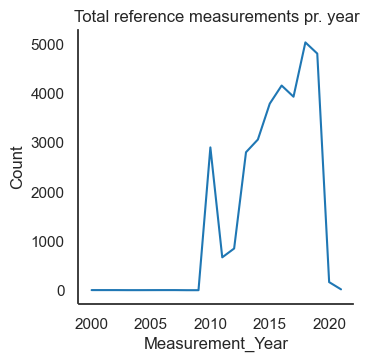

In [211]:
#Find number of total measurements pr. year
Total_assesment_years = data['Measurement_Year'].value_counts().reset_index()
fig = sns.lineplot(data= Total_assesment_years, x='index', y='Measurement_Year', color = colour)
#fig.set_xticklabels( labels= regions)
fig.set(xlabel='Measurement_Year', ylabel='Count')
fig.set(title = "Total reference measurements pr. year")

# Remove the top and right spines from the plots and add some space between the spines and the axes
sns.despine(offset=1)


plt.show()

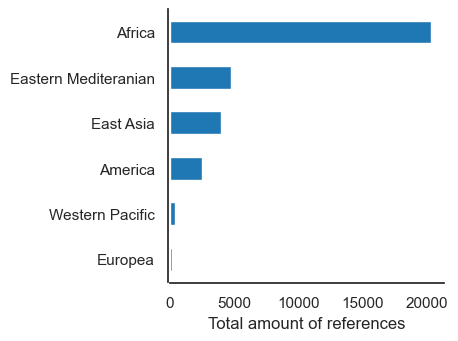

In [127]:
# Find number of measurements pr. region

data_regions = data['Region'].value_counts().sort_values(ascending = True)

ax = data_regions.plot(kind = 'barh', color = colour)
ax.set_yticklabels(
    ax.set_yticklabels(regions))
ax.set_xlabel('Total amount of references')

# Remove the top and right spines from the plots and add some space between the spines and the axes
sns.despine(offset=1)

plt.show()

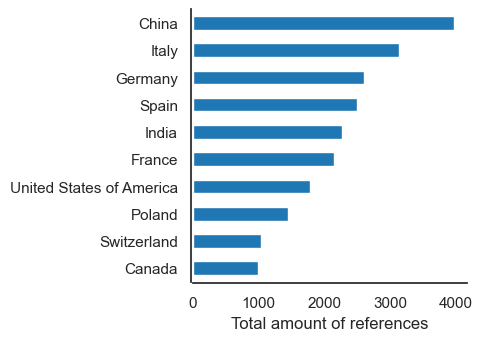

In [130]:
# Find top 10 countries in number of measurements
ax = top_10_countries = data['Country'].value_counts().head(10).sort_values(ascending = True).plot(kind = 'barh', color = colour)
ax.set_xlabel('Total amount of references')

# Remove the top and right spines from the plots and add some space between the spines and the axes
sns.despine(offset=1)


plt.show()

# Explore measurement values:

In [152]:
# Calculate average annual levels of pollutants
pollution_trends = data.groupby('Measurement_Year')[['PM2.5(μg/m3)', 'PM10(μg/m3)', 'NO2(μg/m3)']].mean()

# Trend lines
fig, ax = plt.subplots(figsize=(12, 6), color= ([cmap[1], cmap[2], cmap[3])
pollution_trends.plot(ax=ax)
ax.set_title('Average Annual Levels of PM2.5, PM10, and NO2')
ax.set_xlabel('Year')
ax.set_ylabel('Concentration (μg/m3)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (2062231051.py, line 5)

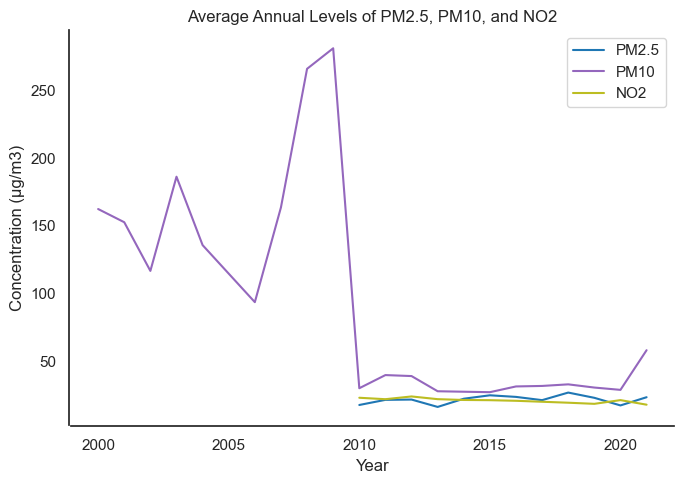

In [159]:


# Creating the plot
fig, ax = plt.subplots(figsize=(7, 5))

# Plotting each pollutant with a specific color
ax.plot(pollution_trends['PM2.5(μg/m3)'], color=cmap[0], label='PM2.5')
ax.plot(pollution_trends['PM10(μg/m3)'], color=cmap[5], label='PM10')
ax.plot(pollution_trends['NO2(μg/m3)'], color=cmap[6], label='NO2')

# Setting title and labels
ax.set_title('Average Annual Levels of PM2.5, PM10, and NO2')
ax.set_xlabel('Year')
ax.set_ylabel('Concentration (μg/m3)')

# Remove the top and right spines from the plots and add some space between the spines and the axes
sns.despine(offset=1)

# Adding legend, rotating x-axis labels, and adjusting layout
ax.legend()
plt.tight_layout()
plt.show()


Explore measurement values

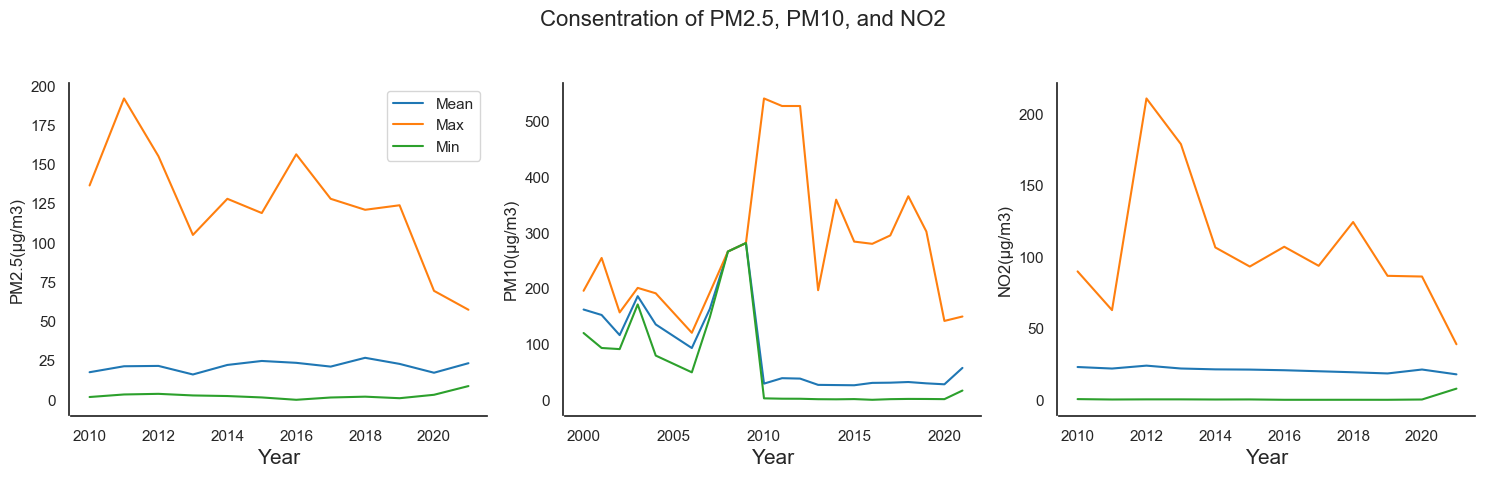

In [162]:

# Create a figure with 6 subplots, sharing the same x-axis and y-axis
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))

# Plot the mean and max values of PM2.5 over time
ax1 = sns.lineplot(x= 'Measurement_Year' , y='PM2.5(μg/m3)', data=data, ax=axs[0], estimator=np.mean, color = cmap[0], errorbar=None,  legend = True)  
ax1 = sns.lineplot(x='Measurement_Year' , y='PM2.5(μg/m3)', data=data, ax=axs[0], estimator=np.max, color = cmap[1] ,errorbar=None,  legend = False)
ax1 = sns.lineplot(x='Measurement_Year' , y='PM2.5(μg/m3)', data=data, ax=axs[0], estimator=np.min, color = cmap[2], errorbar=None,  legend = False)



# Plot the mean and max values of PM10 over time
ax2 = sns.lineplot(x= 'Measurement_Year' , y='PM10(μg/m3)', data=data, ax=axs[1], estimator=np.mean, color = cmap[0], errorbar=None,  legend = True)  
ax2 = sns.lineplot(x='Measurement_Year' , y='PM10(μg/m3)', data=data, ax=axs[1], estimator=np.max, color = cmap[1], errorbar=None,  legend = False)
ax2 = sns.lineplot(x='Measurement_Year' , y='PM10(μg/m3)', data=data, ax=axs[1], estimator=np.min, color = cmap[2], errorbar=None,  legend = False)


# Plot the mean and max values of NO2 over time
ax3 = sns.lineplot(x= 'Measurement_Year' , y='NO2(μg/m3)', data=data, ax=axs[2], estimator=np.mean, color = cmap[0], errorbar=None,  legend = True)  
ax3 = sns.lineplot(x='Measurement_Year' , y='NO2(μg/m3)', data=data, ax=axs[2], estimator=np.max, color = cmap[1] ,errorbar=None,  legend = False)
ax3 = sns.lineplot(x='Measurement_Year' , y='NO2(μg/m3)', data=data, ax=axs[2], estimator=np.min, color = cmap[2], errorbar=None,  legend = False)

#Labels
ax1.set_xlabel('Year', fontsize = 15)
ax2.set_xlabel('Year', fontsize = 15)
ax3.set_xlabel('Year', fontsize = 15)


#Add legend
legend_labels = { 'Mean': '#1f77b4', 'Max': '#ff7f0e', 'Min': '#2ca02c'}
ax1.legend(legend_labels)

# Adding a main title for all subplots
plt.suptitle('Consentration of PM2.5, PM10, and NO2', fontsize=16)

# Adjust layout to fit subplots and titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Remove the top and right spines from the plots and add some space between the spines and the axes
sns.despine(offset=1)

plt.show()

TypeError: 'value' must be an instance of str or bytes, not a tuple

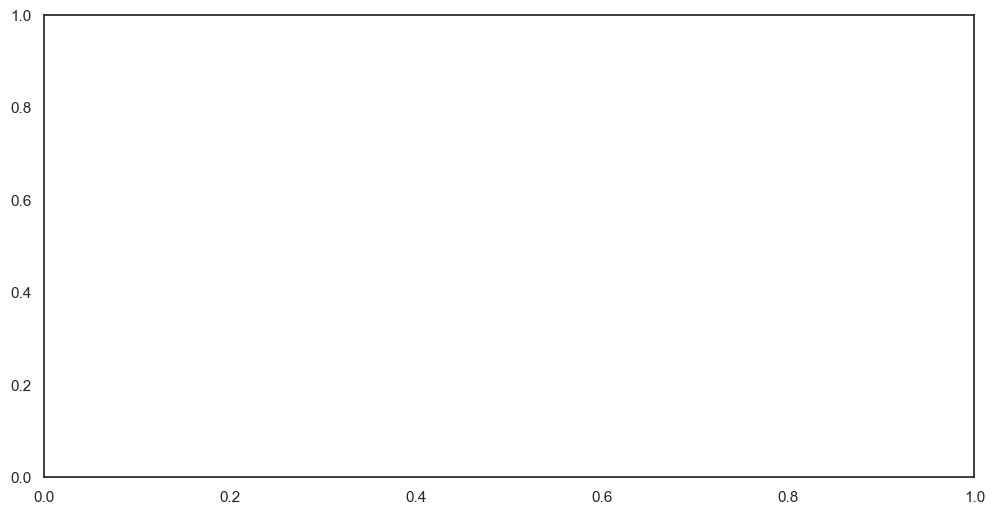

# Regional Consentrations

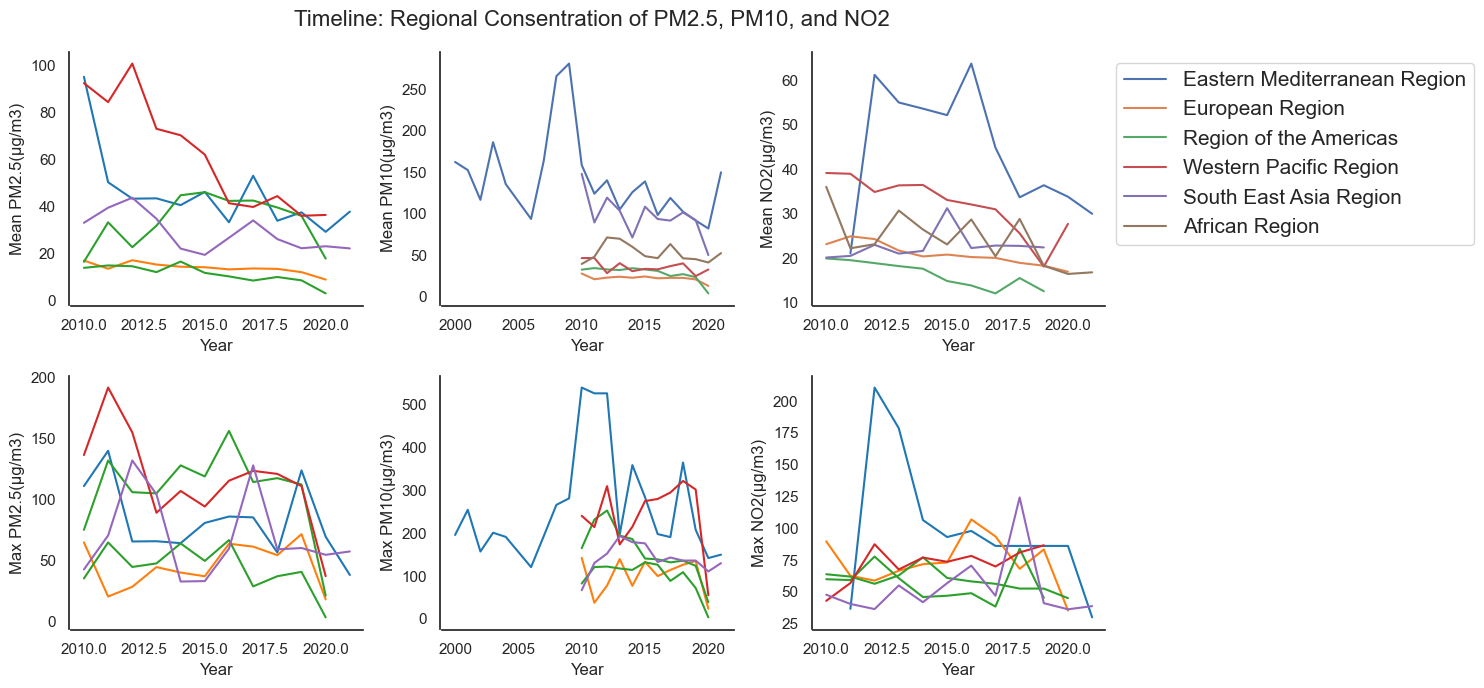

In [213]:
# Create a figure with 6 subplots, sharing the same x-axis and y-axis
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 7))

# Plot the mean and max values of PM2.5, PM10, and NO2 for each region over time
ax1 = sns.lineplot(x= 'Measurement_Year', y='PM2.5(μg/m3)', hue = 'Region', data=data, ax=axs[0,0],  palette = cmap, estimator=np.mean, errorbar=None,  legend = False)  
ax2 = sns.lineplot(x='Measurement_Year' , y='PM10(μg/m3)', hue = 'Region', data=data, ax=axs[0,1], estimator=np.mean, errorbar=None,  legend = False)
ax3 = sns.lineplot(x='Measurement_Year' , y='NO2(μg/m3)', hue = 'Region', data=data, ax=axs[0,2], estimator=np.mean, errorbar=None,  legend = True)

ax4 = sns.lineplot(x= 'Measurement_Year', y='PM2.5(μg/m3)', hue = 'Region', data=data, ax=axs[1,0],  palette = cmap, estimator=np.max,errorbar=None, legend = False) 
ax5 = sns.lineplot(x='Measurement_Year' , y='PM10(μg/m3)', hue = 'Region', data=data, ax=axs[1,1],  palette = cmap, estimator=np.max, errorbar=None, legend = False)
ax6 = sns.lineplot(x='Measurement_Year' , y='NO2(μg/m3)', hue = 'Region', data=data, ax=axs[1,2],  palette = cmap, estimator=np.max, errorbar=None, legend = False)

# Set labels on axes
ax1.set_ylabel('Mean PM2.5(μg/m3)', fontsize = 12)
ax2.set_ylabel('Mean PM10(μg/m3)', fontsize = 12)
ax3.set_ylabel('Mean NO2(μg/m3)', fontsize = 12)
ax4.set_ylabel('Max PM2.5(μg/m3)', fontsize = 12)
ax5.set_ylabel('Max PM10(μg/m3)', fontsize = 12)
ax6.set_ylabel('Max NO2(μg/m3)', fontsize = 12)

ax1.set_xlabel('Year', fontsize = 12)
ax2.set_xlabel('Year', fontsize = 12)
ax3.set_xlabel('Year', fontsize = 12)
ax4.set_xlabel('Year', fontsize = 12)
ax5.set_xlabel('Year', fontsize = 12)
ax6.set_xlabel('Year', fontsize = 12)

# Move the legend to the right of the third subplot
ax3.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon = True, fontsize =15)


# Adding a main title for all subplots
plt.suptitle('Timeline: Regional Consentration of PM2.5, PM10, and NO2', fontsize=16, x = 0.4)

# Adjust layout to fit subplots and titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Remove the top and right spines from the plots and add some space between the spines and the axes
sns.despine(offset=1) 

# Adjust the layout of the subplots
plt.tight_layout()

# Show the figure
plt.show()


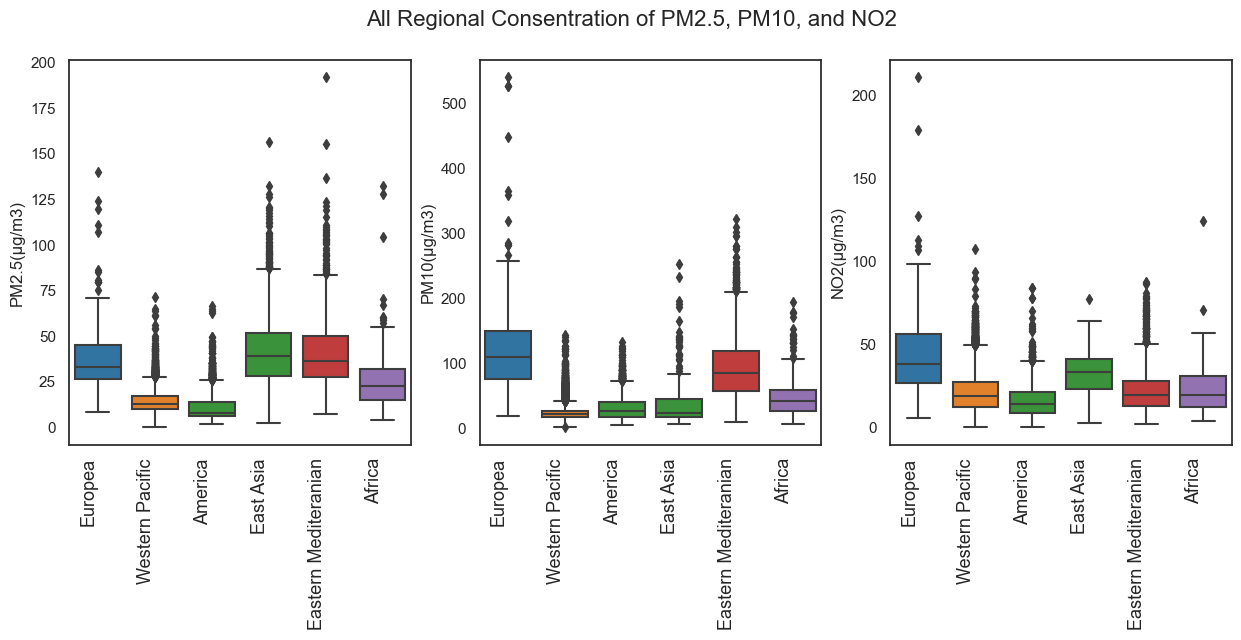

In [183]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))

ax1 = sns.boxplot(x='Region', y='PM2.5(μg/m3)', data=data, ax=axs[0], palette = cmap)
ax2 = sns.boxplot(x='Region', y='PM10(μg/m3)', data=data, ax=axs[1],  palette = cmap)
ax3 = sns.boxplot(x='Region',y='NO2(μg/m3)', data=data, ax=axs[2],  palette = cmap)


# Remove the top and right spines from the plots and add some space between the spines and the axes
#sns.despine(offset=1)

ax1.set_xlabel('')
ax1.set_xticklabels(
    ax1.set_xticklabels(regions, fontsize = 13), 
    rotation=90, 
    horizontalalignment='right', fontsize = 13)
ax2.set_xlabel('')
ax2.set_xticklabels(
    ax1.set_xticklabels(regions), 
    rotation=90, 
    horizontalalignment='right', fontsize = 13)
ax3.set_xlabel('')
ax3.set_xticklabels(
    ax1.set_xticklabels(regions), 
    rotation=90, 
    horizontalalignment='right', fontsize = 13)

# Remove the top and right spines from the plots and add some space between the spines and the axes
#sns.despine(offset=1)

# Adding a main title for all subplots
plt.suptitle('All Regional Consentration of PM2.5, PM10, and NO2', fontsize=16, x = 0.5)

# Adjust layout to fit subplots and titles
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])


plt.show()

# Value Distribution in dataset: Consentrations (μg/m3) and Temporal Coverages

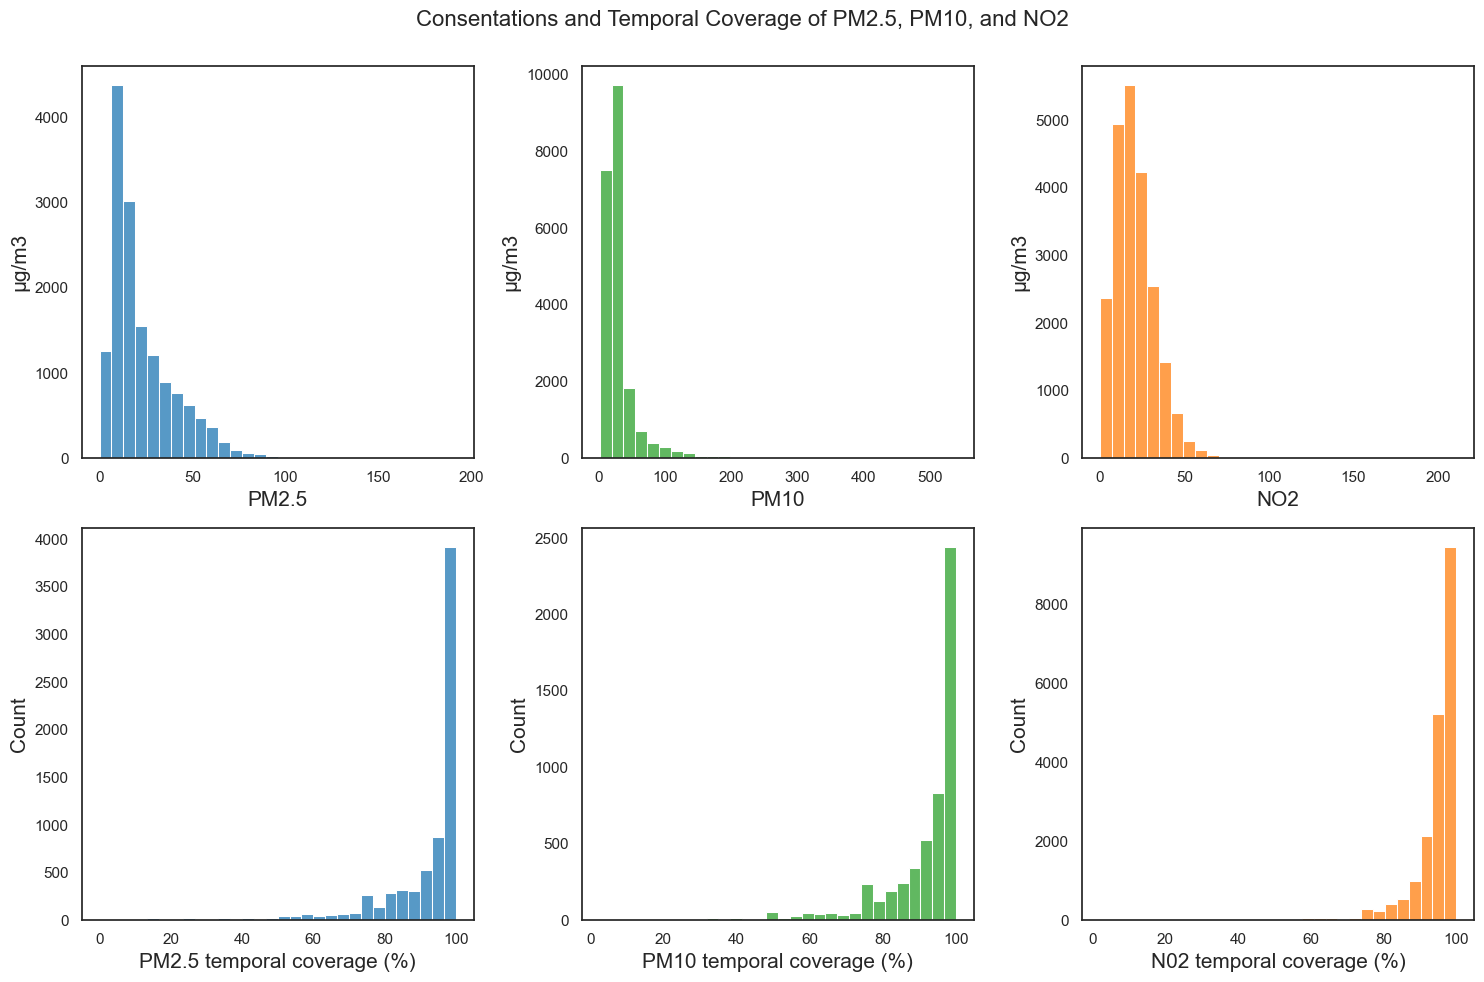

In [242]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))

ax1 = sns.histplot(data=data['PM2.5(μg/m3)'], bins = 30, ax=axs[0,0], color=cmap[0])
ax2 = sns.histplot(data = data['PM10(μg/m3)'], bins = 30, ax=axs[0,1], color =cmap[2])
ax3 = sns.histplot(data = data['NO2(μg/m3)'], bins = 30, ax=axs[0,2], color = cmap[1])
ax4 = sns.histplot(data = data['PM25_temp._cov.(%)'], bins = 30, ax=axs[1,0], color = cmap[0])
ax5 = sns.histplot(data = data['PM10 temporal coverage (%)'], bins = 30, ax=axs[1,1], color = cmap[2])
ax6 = sns.histplot(data = data['NO2_temp._cov.(%)'], bins = 30, ax=axs[1,2], color = cmap[1])


plt.tight_layout()

ax1.set_xlabel('PM2.5', fontsize = 15)
ax1.set_ylabel('μg/m3', fontsize = 15)
ax2.set_xlabel('PM10', fontsize = 15)
ax2.set_ylabel('μg/m3', fontsize = 15)
ax3.set_xlabel('NO2', fontsize = 15)
ax3.set_ylabel('μg/m3', fontsize = 15)
ax4.set_xlabel('PM2.5 temporal coverage (%)', fontsize = 15)
ax4.set_ylabel('Count', fontsize = 15)
ax5.set_xlabel('PM10 temporal coverage (%)', fontsize = 15)
ax5.set_ylabel('Count', fontsize = 15)
ax6.set_xlabel('N02 temporal coverage (%)', fontsize = 15)
ax6.set_ylabel('Count', fontsize = 15)

# Adding a main title for all subplots
plt.suptitle('Consentations and Temporal Coverage of PM2.5, PM10, and NO2', fontsize=16, x = 0.5)

# Adjust layout to fit subplots and titles
plt.tight_layout(rect=[0, 0, 1, 0.98])


plt.show()

# Correlation between pollution meassures

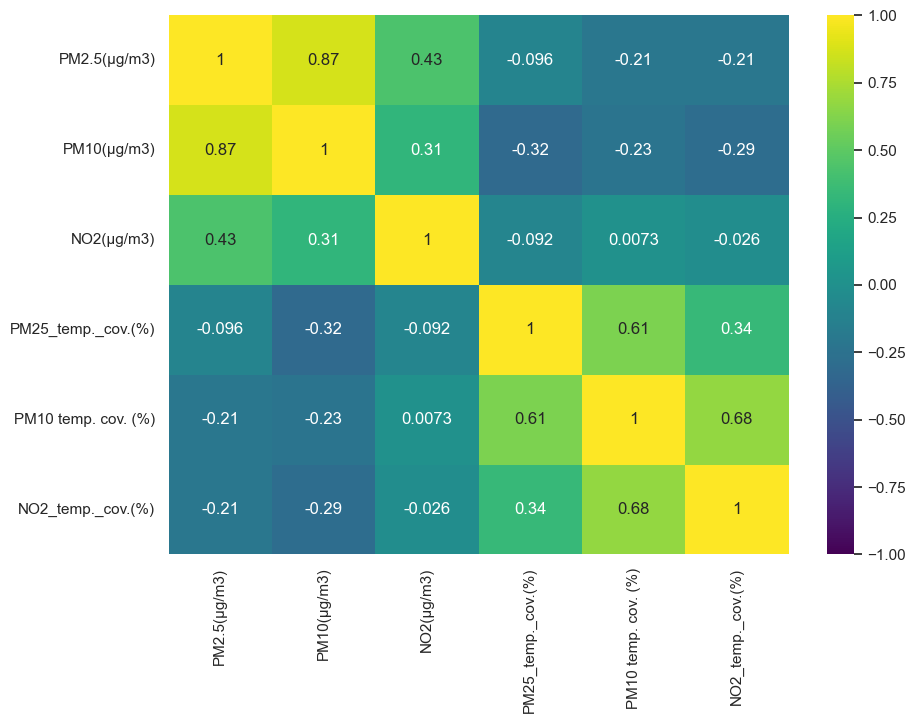

In [202]:
#new_df = data[['Region', 'Measurement_Year', 'PM2.5(μg/m3)', 'PM10(μg/m3)', 'NO2(μg/m3)']]

plt.figure(figsize=(10,7))
new_num = data[['PM2.5(μg/m3)', 'PM10(μg/m3)', 'NO2(μg/m3)', 'PM25_temp._cov.(%)','PM10 temporal coverage (%)','NO2_temp._cov.(%)' ]]
#rename columns
new_num.rename(columns = {'PM25 temporal coverage (%)': 'PM25 temp. cov. (%)','PM10 temporal coverage (%)': 'PM10 temp. cov. (%)','NO2 temporal coverage (%)': 'NO2 temp. cov. (%)' }, inplace = True)

heat =new_num.corr()
sns.heatmap(heat, vmin=-1.0, vmax=1.0, annot = True, cmap ='viridis')


plt.show()
#'twilight_shifted'

C:\Users\Tori\AppData\Local\Temp\ipykernel_19880\1119951538.py:2: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  ax = sns.scatterplot(data=data, x="PM10(μg/m3)", y="PM2.5(μg/m3)", hue="Region", alpha=0.8, palette =cmap)


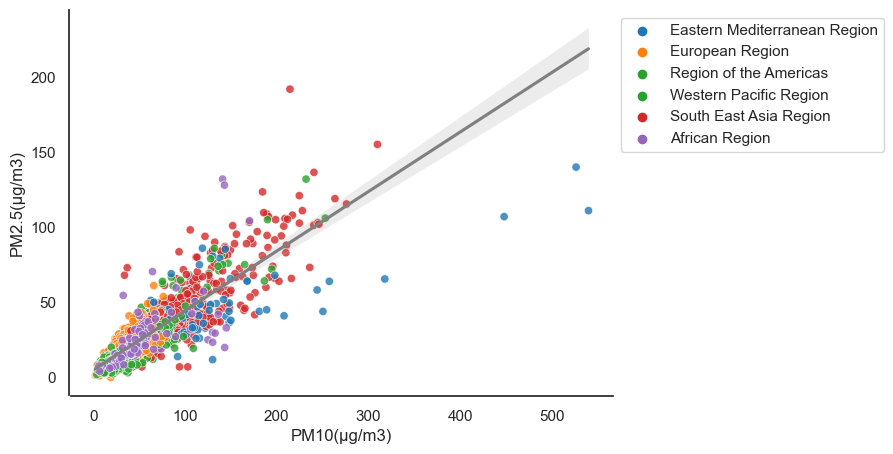

In [210]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(data=data, x="PM10(μg/m3)", y="PM2.5(μg/m3)", hue="Region", alpha=0.8, palette =cmap)

# Move the legend to the right of the plot
ax.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=True, fontsize=11)

# Overlay the regression line
sns.regplot(data=data, x="PM10(μg/m3)", y="PM2.5(μg/m3)", scatter=False, ax=ax, color='gray')

# Remove the top and right spines from the plot and add some space between the spines and the axes
sns.despine(offset=1, trim=False)

plt.show()



# Explore most polluted places after 2015, and compare to Hazardous scale

In [228]:
#Subsetting the data in new dataframe in order to see latest trends (2016-)

after2014 = (data['Measurement_Year'] >= 2015)

data1= data.loc[after2014]

In [254]:
#Find thetop 15 polluted cities of PM2.5, PM10, AND NO2:
top = data1.groupby(['Country','City/Locality'])['NO2(μg/m3)'].mean()
top15= top.sort_values(ascending = False).head(15)
top15 = top15.sort_values(ascending = True)
top15 = pd.DataFrame(top15)

In [237]:
top2 = data1.groupby(['Country','City/Locality'])['PM2.5(μg/m3)'].mean()
top15_2= top2.sort_values(ascending = False).head(15)
top15_2 = top15_2.sort_values(ascending = True)

In [238]:
top3 = data1.groupby(['Country','City/Locality'])['PM10(μg/m3)'].mean()
top15_3= top3.sort_values(ascending = False).head(15)
top15_3 = top15_3.sort_values(ascending = True)
top15_3 = pd.DataFrame(top15_3)

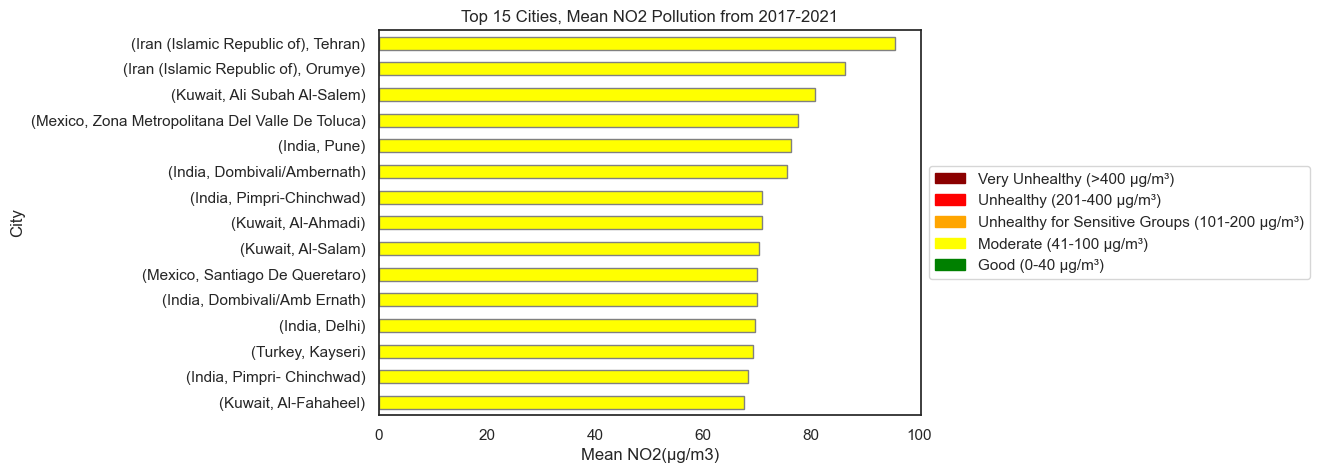

In [257]:

# Define the color scale and corresponding NO2 level labels based on airpollution guidelines
no2_color_scale = ['green', 'yellow', 'orange', 'red', 'darkred']
no2_labels = ['Good (0-40 μg/m³)', 'Moderate (41-100 μg/m³)', 'Unhealthy for Sensitive Groups (101-200 μg/m³)',
               'Unhealthy (201-400 μg/m³)', 'Very Unhealthy (>400 μg/m³)']

# Assign colors based on NO2 levels and airpollution guidelines 
col_no2 = []
for val in top15['NO2(μg/m3)']:
    if val <= 40:
        col_no2.append(no2_color_scale[0])  # Green
    elif val <= 100:
        col_no2.append(no2_color_scale[1])  # Yellow
    elif val <= 200:
        col_no2.append(no2_color_scale[2])  # Orange
    elif val <= 400:
        col_no2.append(no2_color_scale[3])  # Red
    else:
        col_no2.append(no2_color_scale[4])  # Dark Red

# Plotting for NO2 using top10_2
ax_no2 = top15['NO2(μg/m3)'].plot(kind='barh', figsize=(7, 5), color=col_no2, edgecolor = 'gray', title='Top 15 Cities, Mean NO2 Pollution from 2017-2021')
ax_no2.set_xlabel('Mean NO2(μg/m3)')
ax_no2.set_ylabel('City')

# Create a legend for the color categories with the entire scale as a reference on the right side (reversed)
legend_labels_no2 = no2_labels[::-1]  # Reverse the legend labels
legend_handles_no2 = [plt.Rectangle((0, 0), 1, 1, color=no2_color_scale[i]) for i in range(len(no2_color_scale))][::-1]  # Reverse the legend handles
ax_no2.legend(legend_handles_no2, legend_labels_no2, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


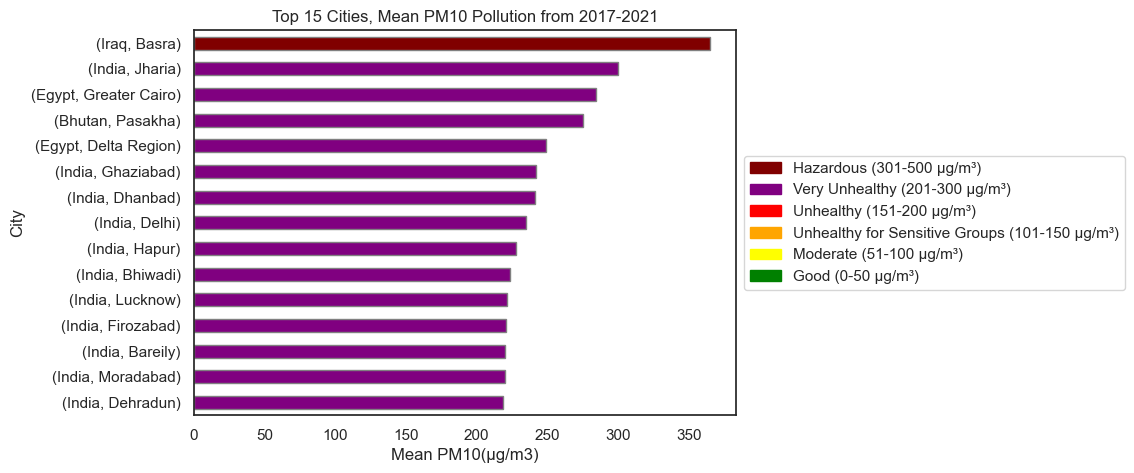

In [258]:
# Define the color scale and corresponding PM10 level labels based on WHO guidelines
color_scale = ['green', 'yellow', 'orange', 'red', 'purple', 'maroon']
pm10_labels = ['Good (0-50 μg/m³)', 'Moderate (51-100 μg/m³)', 'Unhealthy for Sensitive Groups (101-150 μg/m³)',
               'Unhealthy (151-200 μg/m³)', 'Very Unhealthy (201-300 μg/m³)', 'Hazardous (301-500 μg/m³)']

# Assign colors based on PM10 levels and WHO guidelines
col = []
for val in top15_3['PM10(μg/m3)']:
    if val <= 50:
        col.append(color_scale[0])  # Green
    elif val <= 100:
        col.append(color_scale[1])  # Yellow
    elif val <= 150:
        col.append(color_scale[2])  # Orange
    elif val <= 200:
        col.append(color_scale[3])  # Red
    elif val <= 300:
        col.append(color_scale[4])  # Purple
    else:
        col.append(color_scale[5])  # Maroon

# Plotting
ax = top15_3['PM10(μg/m3)'].plot(kind='barh', figsize=(7, 5), color=col, edgecolor = 'gray', title='Top 15 Cities, Mean PM10 Pollution from 2017-2021')
ax.set_xlabel('Mean PM10(μg/m3)')
ax.set_ylabel('City')


# Create a legend for the color categories with the entire scale as a reference on the right side
legend_labels = pm10_labels[::-1]  # Reverse the order of legend labels
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color_scale[i]) for i in reversed (range(len(color_scale)))]
ax.legend(legend_handles, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


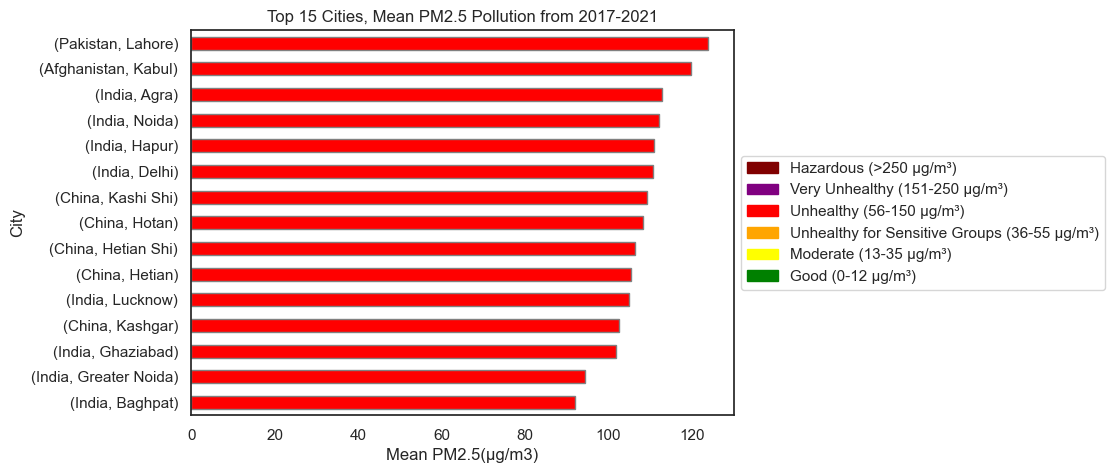

In [276]:
import matplotlib.pyplot as plt

# Assuming top10_2 is the DataFrame for PM2.5

# Define the color scale and corresponding PM2.5 level labels based on WHO guidelines
pm25_color_scale = ['green', 'yellow', 'orange', 'red', 'purple', 'maroon']
pm25_labels = ['Good (0-12 μg/m³)', 'Moderate (13-35 μg/m³)', 'Unhealthy for Sensitive Groups (36-55 μg/m³)',
               'Unhealthy (56-150 μg/m³)', 'Very Unhealthy (151-250 μg/m³)', 'Hazardous (>250 μg/m³)']

# Assign colors based on PM2.5 levels and WHO guidelines for top10_2
col_pm25 = []
for val in top15_2:
    if val <= 12:
        col_pm25.append(pm25_color_scale[0])  # Green
    elif val <= 35:
        col_pm25.append(pm25_color_scale[1])  # Yellow
    elif val <= 55:
        col_pm25.append(pm25_color_scale[2])  # Orange
    elif val <= 150:
        col_pm25.append(pm25_color_scale[3])  # Red
    elif val <= 250:
        col_pm25.append(pm25_color_scale[4])  # Purple
    else:
        col_pm25.append(pm25_color_scale[5])  # Maroon

# Plotting for PM2.5 using top10_2
ax_pm25 = top15_2.plot(kind='barh', figsize=(7, 5), color=col_pm25, edgecolor = 'gray', title='Top 15 Cities, Mean PM2.5 Pollution from 2017-2021')
ax_pm25.set_xlabel('Mean PM2.5(μg/m3)')
ax_pm25.set_ylabel('City')

# Create a legend for the color categories with the entire scale as a reference on the right side
legend_labels_pm25 = pm25_labels[::-1]  # Reverse the order of legend labels
legend_handles_pm25 = [plt.Rectangle((0, 0), 1, 1, color=pm25_color_scale[i]) for i in reversed(range(len(pm25_color_scale)))]  # Reverse the order of legend handles
ax_pm25.legend(legend_handles_pm25, legend_labels_pm25, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
